In [707]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [708]:
pd.set_option('display.max_columns', None)

In [709]:
# Importando a base
df_base = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df_base['Date'] = pd.to_datetime(df_base['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')

# Filtrando a base para ter dados a partir de 2015
df_base = df_base.loc[df_base['Date'].dt.year >= 2015]


df_base.sort_values('Date', ascending=True).head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
1710,2015-01-02 18:00:00,MKS Będzin,Jastrzębski Węgiel,0,3,49.0,60.0,3.0,8.0,"1,00",68.0,9,13.0,22.0,32%,12,17%,91.0,7.0,12.0,37,41%,9.0,"3,00",58,74,6,6,"2,00",52,4,8,27,51%,13,25%,94,2,9,40,43%,12,"4,00",1
1714,2015-01-03 14:45:00,BBTS Bielsko-Biała,Czarni Radom,0,3,40.0,55.0,5.0,7.0,"1,67",62.0,4,1.0,32.0,51%,22,35%,76.0,8.0,13.0,31,41%,4.0,"1,33",55,73,2,11,"0,67",48,6,7,23,47%,15,31%,66,2,4,40,61%,13,"4,33",1
1712,2015-01-03 15:00:00,PGE Skra Bełchatów,AZS Olsztyn,3,0,55.0,75.0,4.0,13.0,"1,33",49.0,5,6.0,32.0,65%,15,30%,73.0,5.0,5.0,40,55%,11.0,"3,67",37,60,2,11,"0,67",62,16,14,20,32%,14,22%,77,7,11,30,39%,5,"1,67",0
1713,2015-01-03 18:00:00,Cuprum Lubin,Projekt Warszawa,3,0,55.0,78.0,7.0,12.0,"2,33",50.0,4,5.0,32.0,64%,23,46%,75.0,6.0,7.0,42,56%,6.0,"2,00",41,62,2,12,"0,67",66,9,10,27,40%,10,15%,70,7,6,32,46%,7,"2,33",0
1716,2015-01-03 18:00:00,Trefl Gdańsk,Chemik Bydgoszcz,3,2,73.0,102.0,7.0,18.0,"1,40",90.0,4,20.0,55.0,61%,29,32%,119.0,6.0,8.0,56,47%,10.0,"2,00",80,107,2,17,"0,40",84,9,22,44,52%,26,30%,127,5,10,70,55%,8,"1,60",0


In [710]:
# Tirando os % das colunas de percentual
perc_cols = [
    'T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 
    'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 
    'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum'
]
for col in perc_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace('%', ''))

In [711]:
# Ajustando virgulas por pontos nas colunas de float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace(',', '.'))

In [712]:
df_base.dtypes

Date                datetime64[ns]
Team_1                      object
Team_2                      object
T1_Score                     int64
T2_Score                     int64
T1_Sum                     float64
T1_BP                      float64
T1_Ratio                   float64
T1_Srv_Sum                 float64
T1_Srv_Err                 float64
T1_Srv_Ace                 float64
T1_Srv_Eff                   int64
T1_Rec_Sum                 float64
T1_Rec_Err                 float64
T1_Rec_Pos                   int64
T1_Rec_Perf                  int64
T1_Att_Sum                   int64
T1_Att_Err                 float64
T1_Att_Blk                 float64
T1_Att_Kill                float64
T1_Att_Kill_Perc             int64
T1_Att_Eff                   int64
T1_Blk_Sum                 float64
T1_Blk_As                  float64
T2_Sum                       int64
T2_BP                        int64
T2_Ratio                     int64
T2_Srv_Sum                   int64
T2_Srv_Err          

In [713]:
# Ordenando a base por Data e resetando os index
df_base.sort_values('Date', ascending=True, inplace=True)
df_base.reset_index(inplace=True, drop=True)
df_base['Match_id'] = df_base.index
df_base.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Match_id
0,2015-01-02 18:00:00,MKS Będzin,Jastrzębski Węgiel,0,3,49.0,60.0,3.0,8.0,1.00,68.0,9,13.0,22.0,32,12,17,91.0,7.0,12.0,37,41,9.0,3.00,58,74,6,6,2.00,52,4,8,27,51,13,25,94,2,9,40,43,12,4.00,1,0
1,2015-01-03 14:45:00,BBTS Bielsko-Biała,Czarni Radom,0,3,40.0,55.0,5.0,7.0,1.67,62.0,4,1.0,32.0,51,22,35,76.0,8.0,13.0,31,41,4.0,1.33,55,73,2,11,0.67,48,6,7,23,47,15,31,66,2,4,40,61,13,4.33,1,1
2,2015-01-03 15:00:00,PGE Skra Bełchatów,AZS Olsztyn,3,0,55.0,75.0,4.0,13.0,1.33,49.0,5,6.0,32.0,65,15,30,73.0,5.0,5.0,40,55,11.0,3.67,37,60,2,11,0.67,62,16,14,20,32,14,22,77,7,11,30,39,5,1.67,0,2
3,2015-01-03 18:00:00,Cuprum Lubin,Projekt Warszawa,3,0,55.0,78.0,7.0,12.0,2.33,50.0,4,5.0,32.0,64,23,46,75.0,6.0,7.0,42,56,6.0,2.00,41,62,2,12,0.67,66,9,10,27,40,10,15,70,7,6,32,46,7,2.33,0,3
4,2015-01-03 18:00:00,Trefl Gdańsk,Chemik Bydgoszcz,3,2,73.0,102.0,7.0,18.0,1.40,90.0,4,20.0,55.0,61,29,32,119.0,6.0,8.0,56,47,10.0,2.00,80,107,2,17,0.40,84,9,22,44,52,26,30,127,5,10,70,55,8,1.60,0,4


In [714]:
print(f'Numero de partidas jogadas: {len(df_base)}')

Numero de partidas jogadas: 1655


In [715]:
# Matches should have between 3 and 5 sets
df_base['sets'] = df_base['T1_Score'] + df_base['T2_Score']
df_base[(df_base['sets'] < 3) | (df_base['sets'] > 5)]

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Match_id,sets


In [716]:
# Médias por set (Quanto mais tempo o jogo dura, maior é a soma das diferentes estatísticas)
medias_por_set = ['T1_Sum', 'T1_BP', 'T1_Srv_Sum', 'T1_Srv_Err', 'T1_Srv_Ace', 'T1_Rec_Sum', 
      'T1_Rec_Err', 'T1_Att_Sum', 'T1_Att_Err', 'T1_Att_Blk', 'T1_Att_Kill', 
      'T1_Blk_Sum', 'T1_Blk_As','T2_Sum', 'T2_BP', 'T2_Srv_Sum', 'T2_Srv_Err', 
      'T2_Srv_Ace', 'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Att_Sum', 'T2_Att_Err', 
      'T2_Att_Blk', 'T2_Att_Kill', 'T2_Blk_Sum', 'T2_Blk_As']
medias_por_set_novas = [f'{c}_SAvg' for c in medias_por_set]
df_base[medias_por_set_novas] = df_base[medias_por_set].div(df_base['sets'], axis=0)

In [717]:
t1_df = pd.concat([df_base[['Match_id', 'Date', 'Team_1', 'T1_Score']], df_base.loc[:, 'T1_Sum': 'T1_Blk_As'], df_base.loc[:, 'T1_Sum_SAvg':'T1_Blk_As_SAvg']], axis=1)
t2_df = pd.concat([df_base[['Match_id', 'Date', 'Team_2', 'T2_Score']], df_base.loc[:, 'T2_Sum': 'T2_Blk_As'], df_base.loc[:, 'T2_Sum_SAvg':'T2_Blk_As_SAvg']], axis=1)
t1_df['Oponente'] = df_base['Team_2']
t2_df['Oponente'] = df_base['Team_1']

In [718]:
# Combinando os datasets para que cada linha seja para a performance de um time
concatenacao_colunas = {x: y for x, y in zip(t2_df.columns, t1_df.columns)}
time_perf_df = pd.concat([t1_df, t2_df.rename(columns=concatenacao_colunas)])
time_perf_df.columns = time_perf_df.columns.str.replace('T1_', '')

In [719]:
time_perf_df.sort_values('Date', ascending=True).head()

,Match_id,Date,Team_1,Score,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Sum_SAvg,BP_SAvg,Srv_Sum_SAvg,Srv_Err_SAvg,Srv_Ace_SAvg,Rec_Sum_SAvg,Rec_Err_SAvg,Att_Sum_SAvg,Att_Err_SAvg,Att_Blk_SAvg,Att_Kill_SAvg,Blk_Sum_SAvg,Blk_As_SAvg,Oponente
0,0,2015-01-02 18:00:00,MKS Będzin,0,49.0,60.0,3.0,8.0,1.00,68.0,9,13.0,22.0,32,12,17,91.0,7.0,12.0,37,41,9.0,3.00,16.333333,20.000000,2.666667,0.333333,22.666667,4.333333,7.333333,5.666667,30.333333,2.333333,4.000000,3.000000,1.000000,Jastrzębski Węgiel
0,0,2015-01-02 18:00:00,Jastrzębski Węgiel,3,58.0,74.0,6.0,6.0,2.00,52.0,4,8.0,27.0,51,13,25,94.0,2.0,9.0,40,43,12.0,4.00,19.333333,24.666667,2.000000,0.666667,17.333333,2.666667,9.000000,8.333333,31.333333,0.666667,3.000000,4.000000,1.333333,MKS Będzin
1,1,2015-01-03 14:45:00,Czarni Radom,3,55.0,73.0,2.0,11.0,0.67,48.0,6,7.0,23.0,47,15,31,66.0,2.0,4.0,40,61,13.0,4.33,18.333333,24.333333,3.666667,0.223333,16.000000,2.333333,7.666667,10.333333,22.000000,0.666667,1.333333,4.333333,1.443333,BBTS Bielsko-Biała
1,1,2015-01-03 14:45:00,BBTS Bielsko-Biała,0,40.0,55.0,5.0,7.0,1.67,62.0,4,1.0,32.0,51,22,35,76.0,8.0,13.0,31,41,4.0,1.33,13.333333,18.333333,2.333333,0.556667,20.666667,0.333333,10.666667,11.666667,25.333333,2.666667,4.333333,1.333333,0.443333,Czarni Radom
2,2,2015-01-03 15:00:00,PGE Skra Bełchatów,3,55.0,75.0,4.0,13.0,1.33,49.0,5,6.0,32.0,65,15,30,73.0,5.0,5.0,40,55,11.0,3.67,18.333333,25.000000,4.333333,0.443333,16.333333,2.000000,10.666667,10.000000,24.333333,1.666667,1.666667,3.666667,1.223333,AZS Olsztyn


In [720]:
# Define a function to create rolling averages for each metric
def rolling_average(group, cols, new_cols):
    group = group.sort_values('Date')
    rolling_stats = group[cols].rolling(4, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [721]:
roll_col_names = list(team_perf_df.columns)[3:-1]
roll_new_col_names = [f'{c}_Partida' for c in roll_col_names]

In [722]:
# Group data by teams, and calculate rolling averages for each one of them

partidas = time_perf_df.groupby('Team_1').apply(lambda x: rolling_average(x, roll_col_names, roll_new_col_names))
partidas = partidas.droplevel('Team_1')
partidas = partidas.drop(roll_col_names[1:], axis=1)

In [723]:
partidas.sort_values('Date', ascending=True).head()

,Match_id,Date,Team_1,Score,Oponente,Score_Partida,Sum_Partida,BP_Partida,Ratio_Partida,Srv_Sum_Partida,Srv_Err_Partida,Srv_Ace_Partida,Srv_Eff_Partida,Rec_Sum_Partida,Rec_Err_Partida,Rec_Pos_Partida,Rec_Perf_Partida,Att_Sum_Partida,Att_Err_Partida,Att_Blk_Partida,Att_Kill_Partida,Att_Kill_Perc_Partida,Att_Eff_Partida,Blk_Sum_Partida,Blk_As_Partida,Sum_SAvg_Partida,BP_SAvg_Partida,Srv_Sum_SAvg_Partida,Srv_Err_SAvg_Partida,Srv_Ace_SAvg_Partida,Rec_Sum_SAvg_Partida,Rec_Err_SAvg_Partida,Att_Sum_SAvg_Partida,Att_Err_SAvg_Partida,Att_Blk_SAvg_Partida,Att_Kill_SAvg_Partida,Blk_Sum_SAvg_Partida,Blk_As_SAvg_Partida
25,25,2015-01-24 17:00:00,Społem Kielce,0,PGE Skra Bełchatów,1.25,56.75,85.50,4.00,12.25,1.105,77.25,10.00,11.00,41.50,54.00,23.50,29.75,116.25,11.00,9.75,43.75,37.00,9.00,2.3950,14.979167,22.458333,3.291667,0.311042,20.750000,2.937500,11.125000,8.020833,30.916667,3.041667,2.583333,2.395833,0.647292
27,27,2015-01-24 18:00:00,Trefl Gdańsk,2,BBTS Bielsko-Biała,2.25,52.75,77.00,4.25,9.75,1.185,58.00,4.75,9.00,30.25,48.50,16.00,25.00,95.00,6.75,8.25,39.75,41.75,8.75,2.5825,15.150000,22.266667,2.650000,0.348333,16.333333,2.333333,8.250000,7.266667,27.700000,2.050000,2.483333,2.583333,0.794167
29,29,2015-01-31 14:45:00,Cuprum Lubin,1,Trefl Gdańsk,2.50,65.00,89.25,8.00,15.50,2.145,69.00,4.50,10.75,37.75,55.00,21.25,31.75,104.75,9.75,11.25,47.75,46.25,9.25,2.4375,17.395833,23.937500,4.125000,0.584792,18.291667,2.791667,10.104167,8.895833,27.750000,2.562500,2.958333,2.437500,0.651042
29,29,2015-01-31 14:45:00,Trefl Gdańsk,3,Cuprum Lubin,2.00,51.75,75.50,4.25,9.75,1.185,59.75,7.00,9.75,28.00,45.00,16.00,24.25,95.25,8.00,8.75,38.75,40.75,8.75,2.5825,14.950000,21.966667,2.650000,0.348333,16.683333,2.483333,7.800000,7.116667,27.750000,2.300000,2.583333,2.583333,0.794167
30,30,2015-01-31 16:00:00,Asseco Resovia,3,Społem Kielce,2.75,67.25,93.50,6.25,12.75,1.595,67.75,8.75,10.75,37.00,52.75,14.25,19.50,97.25,4.75,8.75,50.50,52.75,10.50,2.5750,16.062500,22.287500,2.833333,0.424792,15.654167,2.575000,8.400000,4.654167,22.654167,1.095833,1.958333,2.575000,0.667083


In [724]:
print(f"Número de times: {partidas['Team_1'].nunique()}")

Número de times: 21


In [725]:
# Reformat the dataframe so it contains one match per row
merged_df = partidas.merge(partidas, left_on=['Match_id', 'Date', 'Team_1'], right_on=['Match_id', 'Date', 'Oponente'], suffixes=('_T1', '_T2')).drop_duplicates('Match_id')
merged_df['Winner'] = merged_df.apply(lambda row: 0 if row.Score_T1 > row['Score_T2'] else 1, axis=1)
merged_df = merged_df.drop(['Team_1_T2', 'Oponente_T2'], axis=1)

In [726]:
merged_df.sort_values('Date', ascending=False)
df = merged_df
df.sort_values('Date', ascending=False).head()

,Match_id,Date,Team_1_T1,Score_T1,Oponente_T1,Score_Partida_T1,Sum_Partida_T1,BP_Partida_T1,Ratio_Partida_T1,Srv_Sum_Partida_T1,Srv_Err_Partida_T1,Srv_Ace_Partida_T1,Srv_Eff_Partida_T1,Rec_Sum_Partida_T1,Rec_Err_Partida_T1,Rec_Pos_Partida_T1,Rec_Perf_Partida_T1,Att_Sum_Partida_T1,Att_Err_Partida_T1,Att_Blk_Partida_T1,Att_Kill_Partida_T1,Att_Kill_Perc_Partida_T1,Att_Eff_Partida_T1,Blk_Sum_Partida_T1,Blk_As_Partida_T1,Sum_SAvg_Partida_T1,BP_SAvg_Partida_T1,Srv_Sum_SAvg_Partida_T1,Srv_Err_SAvg_Partida_T1,Srv_Ace_SAvg_Partida_T1,Rec_Sum_SAvg_Partida_T1,Rec_Err_SAvg_Partida_T1,Att_Sum_SAvg_Partida_T1,Att_Err_SAvg_Partida_T1,Att_Blk_SAvg_Partida_T1,Att_Kill_SAvg_Partida_T1,Blk_Sum_SAvg_Partida_T1,Blk_As_SAvg_Partida_T1,Score_T2,Score_Partida_T2,Sum_Partida_T2,BP_Partida_T2,Ratio_Partida_T2,Srv_Sum_Partida_T2,Srv_Err_Partida_T2,Srv_Ace_Partida_T2,Srv_Eff_Partida_T2,Rec_Sum_Partida_T2,Rec_Err_Partida_T2,Rec_Pos_Partida_T2,Rec_Perf_Partida_T2,Att_Sum_Partida_T2,Att_Err_Partida_T2,Att_Blk_Partida_T2,Att_Kill_Partida_T2,Att_Kill_Perc_Partida_T2,Att_Eff_Partida_T2,Blk_Sum_Partida_T2,Blk_As_Partida_T2,Sum_SAvg_Partida_T2,BP_SAvg_Partida_T2,Srv_Sum_SAvg_Partida_T2,Srv_Err_SAvg_Partida_T2,Srv_Ace_SAvg_Partida_T2,Rec_Sum_SAvg_Partida_T2,Rec_Err_SAvg_Partida_T2,Att_Sum_SAvg_Partida_T2,Att_Err_SAvg_Partida_T2,Att_Blk_SAvg_Partida_T2,Att_Kill_SAvg_Partida_T2,Blk_Sum_SAvg_Partida_T2,Blk_As_SAvg_Partida_T2,Winner
1661,1654,2023-03-05 14:45:00,LUK Lublin,1,Projekt Warszawa,1.00,52.25,19.25,27.00,76.00,14.00,6.50,-8.00,63.00,5.50,38.50,16.25,83.25,5.25,8.25,39.25,46.75,30.25,6.50,8.75,14.895833,5.354167,21.520833,4.020833,1.791667,18.354167,1.625000,24.166667,1.520833,2.375000,11.354167,1.750000,2.479167,3,3.00,64.50,24.75,36.00,88.75,16.00,5.25,-8.50,63.00,6.25,45.75,23.50,83.75,5.00,5.00,49.25,60.75,49.50,10.00,9.75,17.229167,6.520833,23.770833,4.312500,1.416667,16.729167,1.604167,22.041667,1.291667,1.270833,13.145833,2.666667,2.500000,1
997,1653,2023-03-04 20:30:00,Cuprum Lubin,1,ZAKSA Kędzierzyn-Koźle,2.25,66.75,20.75,31.25,88.25,20.25,4.75,-12.25,77.50,5.25,49.75,21.75,103.75,9.50,10.25,53.50,50.75,31.25,8.50,12.50,14.716667,4.416667,19.383333,4.483333,0.983333,17.666667,1.216667,23.483333,2.200000,2.450000,11.966667,1.766667,2.766667,3,2.00,60.25,25.50,28.50,85.25,12.75,5.75,-3.25,69.00,7.25,38.75,18.25,98.00,9.25,9.50,46.25,47.00,28.00,8.25,10.50,16.541667,7.020833,22.937500,3.437500,1.625000,18.500000,1.916667,26.562500,2.500000,2.520833,12.687500,2.229167,2.812500,1
1611,1652,2023-03-04 17:30:00,Jastrzębski Węgiel,3,Ślepsk Malow Suwałki,2.50,61.50,27.00,35.25,85.50,15.00,6.75,-5.75,56.00,2.75,47.25,25.25,87.75,5.00,8.00,46.50,53.75,39.00,8.25,12.00,17.625000,7.854167,24.687500,4.229167,1.937500,15.770833,0.750000,24.979167,1.500000,2.229167,13.312500,2.375000,3.437500,1,2.75,57.50,23.25,34.50,85.75,14.75,6.75,-4.25,56.25,4.00,42.75,21.00,79.00,3.25,6.00,42.75,54.00,43.00,8.00,7.50,16.800000,6.983333,24.683333,4.183333,2.083333,15.916667,1.100000,22.766667,0.850000,1.666667,12.416667,2.300000,2.100000,0
507,1651,2023-03-04 14:45:00,Asseco Resovia,0,Warta Zawiercie,2.50,65.25,23.25,31.00,92.25,21.00,4.75,-12.50,66.75,4.25,42.25,19.50,97.25,7.00,7.25,51.00,52.00,36.75,9.50,11.25,17.270833,6.187500,24.604167,5.541667,1.270833,17.583333,1.104167,25.687500,1.854167,1.916667,13.437500,2.562500,3.000000,3,2.25,62.00,26.25,37.25,86.25,14.75,6.75,-6.50,58.25,5.25,48.25,18.25,90.25,4.75,6.75,47.25,53.50,41.25,8.00,11.25,16.591667,6.900000,23.104167,4.058333,1.733333,15.712500,1.500000,23.758333,1.266667,1.750000,12.666667,2.191667,3.083333,1
286,1650,2023-03-03 17:30:00,AZS Olsztyn,3,Barkom Każany Lwów,1.25,61.00,20.00,30.00,87.00,18.75,8.00,-9.50,73.25,4.00,44.25,21.25,97.25,6.50,8.75,47.00,48.00,32.25,6.00,9.25,16.291667,5.312500,23.250000,5.104167,2.104167,19.541667,1.104167,25.958333,1.750000,2.354167,12.583333,1.604167,2.458333,0,0.00,39.75,12.00,13.00,60.25,10.50,3.25,-9.50,62.25,8.50,38.00,19.25,70.75,7.25,7.00,30.50,42.50,22.50,6.00,5.25,13.25

In [727]:
df['Vencedor'] = np.where(df['Winner'] == 0, 1, 0)
df = df.drop('Winner', axis=1)
df.head()

,Match_id,Date,Team_1_T1,Score_T1,Oponente_T1,Score_Partida_T1,Sum_Partida_T1,BP_Partida_T1,Ratio_Partida_T1,Srv_Sum_Partida_T1,Srv_Err_Partida_T1,Srv_Ace_Partida_T1,Srv_Eff_Partida_T1,Rec_Sum_Partida_T1,Rec_Err_Partida_T1,Rec_Pos_Partida_T1,Rec_Perf_Partida_T1,Att_Sum_Partida_T1,Att_Err_Partida_T1,Att_Blk_Partida_T1,Att_Kill_Partida_T1,Att_Kill_Perc_Partida_T1,Att_Eff_Partida_T1,Blk_Sum_Partida_T1,Blk_As_Partida_T1,Sum_SAvg_Partida_T1,BP_SAvg_Partida_T1,Srv_Sum_SAvg_Partida_T1,Srv_Err_SAvg_Partida_T1,Srv_Ace_SAvg_Partida_T1,Rec_Sum_SAvg_Partida_T1,Rec_Err_SAvg_Partida_T1,Att_Sum_SAvg_Partida_T1,Att_Err_SAvg_Partida_T1,Att_Blk_SAvg_Partida_T1,Att_Kill_SAvg_Partida_T1,Blk_Sum_SAvg_Partida_T1,Blk_As_SAvg_Partida_T1,Score_T2,Score_Partida_T2,Sum_Partida_T2,BP_Partida_T2,Ratio_Partida_T2,Srv_Sum_Partida_T2,Srv_Err_Partida_T2,Srv_Ace_Partida_T2,Srv_Eff_Partida_T2,Rec_Sum_Partida_T2,Rec_Err_Partida_T2,Rec_Pos_Partida_T2,Rec_Perf_Partida_T2,Att_Sum_Partida_T2,Att_Err_Partida_T2,Att_Blk_Partida_T2,Att_Kill_Partida_T2,Att_Kill_Perc_Partida_T2,Att_Eff_Partida_T2,Blk_Sum_Partida_T2,Blk_As_Partida_T2,Sum_SAvg_Partida_T2,BP_SAvg_Partida_T2,Srv_Sum_SAvg_Partida_T2,Srv_Err_SAvg_Partida_T2,Srv_Ace_SAvg_Partida_T2,Rec_Sum_SAvg_Partida_T2,Rec_Err_SAvg_Partida_T2,Att_Sum_SAvg_Partida_T2,Att_Err_SAvg_Partida_T2,Att_Blk_SAvg_Partida_T2,Att_Kill_SAvg_Partida_T2,Blk_Sum_SAvg_Partida_T2,Blk_As_SAvg_Partida_T2,Vencedor
0,31,2015-01-31 17:00:00,AZS Częstochowa,2,BBTS Bielsko-Biała,2.00,65.00,90.25,4.00,18.75,0.9950,76.00,5.25,14.25,45.50,59.25,25.25,32.75,115.00,7.00,11.00,51.00,44.75,10.00,2.6075,16.379167,22.704167,4.783333,0.250625,19.045833,3.545833,11.350000,8.495833,28.754167,1.695833,2.745833,2.608333,0.709583,3,1.50,62.50,85.00,5.50,13.50,1.4675,73.50,8.00,10.25,33.00,44.75,17.25,24.25,103.00,9.25,9.50,50.75,48.50,6.25,1.6025,16.370833,22.275,3.529167,0.407500,20.066667,2.487500,9.025000,7.179167,27.383333,2.491667,2.666667,1.604167,0.431042,0
1,40,2015-02-04 18:30:00,AZS Częstochowa,1,Cuprum Lubin,2.25,66.25,94.00,2.50,20.25,0.5950,76.50,7.00,11.00,44.75,58.00,27.00,34.50,114.75,6.25,11.75,53.25,46.50,10.50,2.5825,15.804167,22.329167,4.920833,0.145625,18.083333,2.633333,10.550000,8.483333,27.104167,1.395833,2.708333,2.583333,0.673333,3,2.00,64.75,91.50,7.25,15.25,1.8125,76.25,5.25,14.25,39.75,51.50,20.00,25.75,113.00,11.50,12.75,48.25,42.50,9.25,2.3125,16.187500,22.875,3.812500,0.453125,19.062500,3.562500,9.937500,6.437500,28.250000,2.875000,3.187500,2.312500,0.578125,0
2,44,2015-02-07 15:00:00,AZS Częstochowa,0,PGE Skra Bełchatów,2.25,68.00,95.25,3.00,16.50,0.7200,76.00,6.00,9.00,46.25,60.00,30.50,39.00,116.00,5.50,13.00,54.50,47.25,10.50,2.5825,16.241667,22.641667,3.983333,0.176875,17.958333,2.133333,10.925000,9.608333,27.416667,1.208333,3.020833,2.583333,0.673333,3,3.00,59.75,79.75,8.00,16.50,2.5625,55.50,6.00,7.25,31.50,56.00,19.75,35.25,80.75,7.00,4.25,42.75,53.75,9.00,2.8350,18.604167,24.625,5.104167,0.828125,16.979167,2.166667,9.604167,11.020833,24.812500,2.208333,1.291667,2.833333,0.903333,0
3,53,2015-02-14 17:00:00,AZS Częstochowa,0,Asseco Resovia,1.50,66.00,94.50,4.25,14.75,1.1375,77.75,8.00,9.25,44.25,55.00,29.50,36.25,115.00,7.25,12.75,53.75,46.75,8.00,1.7500,15.575000,22.391667,3.400000,0.316042,18.541667,2.216667,10.258333,8.691667,27.083333,1.791667,2.937500,1.750000,0.395833,3,3.00,72.50,100.00,6.50,15.75,1.5750,74.25,7.00,16.00,40.50,53.50,16.00,20.75,113.50,6.50,10.00,57.25,50.50,8.75,2.0000,17.125000,23.650,3.750000,0.383750,17.550000,3.837500,9.487500,4.962500,26.862500,1.575000,2.337500,2.000000,0.462500,0
4,57,2015-02-20 18:00:00,AZS Częstochowa,2,AZS Olsztyn,0.75,58.00,83.75,4.00,13.00,1.1200,72.00,8.00,7.50,39.50,53.25,27.00,35.25,104.25,8.00,11.50,47.25,45.25,6.75,1.7675,15.508333,22.541667,3.450000,0.323542,19.391667,2.066667,10.408333,9.425000,27.933333,2.241667,2.920833,1.766667,0.488333,3,1.25,53.75,74.00,3.75,13.00,1.0150,68.50,6.75,9.50,37.50,55.25,22.00,32.00,88.25,6.50,8.75,42.25,48.25,7.75,2.3500,15.750000,21.

In [728]:
mapeamento_colunas = {
    'Team_1_T1': 'T1',
    'Score_T1': 'Set_T1',
    'Score_Partida_T1': 'Set_Score_T1',
    'Sum_Partida_T1': 'PontuacaoFinal_T1', 
    'BP_Partida_T1': 'PontosCADoSaque_T1', 
    'Ratio_Partida_T1': 'Ratio_T1',
    'Srv_Sum_Partida_T1': 'TotalSaques_T1', 
    'Srv_Err_Partida_T1': 'TotalSaquesErrados_T1', 
    'Srv_Eff_Partida_T1': 'PercEficSaque_T1',  
    'Rec_Sum_Partida_T1': 'TotalSaquesRecebidos_T1', 
    'Rec_Err_Partida_T1': 'TotalSaquesRecebidosErrados_T1', 
    'Rec_Pos_Partida_T1': 'PercSaquesRecebidos_T1',
    'Rec_Perf_Partida_T1': 'PercDeSaquesRecebidosPerfeitos_T1',
    'Att_Sum_Partida_T1': 'TotalAtaques_T1', 
    'Att_Err_Partida_T1': 'TotalAtaquesErrados_T1', 
    'Att_Blk_Partida_T1': 'TotalAtaquesBloqueados_T1', 
    'Att_Kill_Partida_T1': 'PontosAtaque_T1',   
    'Att_Kill_Perc_Partida_T1': 'PercPontosAtaque_T1', # (PontosDeAtaque_T1 / TotalAtaques_T1) 
    'Att_Eff_Partida_T1': 'PercEficAtaque_T1', # (PontosDeAtaque_T1 - TotalAtaquesBloqueados_T1  / T1_TotalAtaques)?
    'Sum_SAvg_Partida_T1': 'MediaPontuacaoFinal_T1',
    'BP_SAvg_Partida_T1': 'Media_Pontos_CAProprioSaque_T1',
    'Srv_Sum_SAvg_Partida_T1': 'MediaSaques_T1',
    'Srv_Err_SAvg_Partida_T1': 'MediaErros_Saque_T1',
    'Srv_Ace_SAvg_Partida_T1': 'MediaAces_T1',
    'Rec_Sum_SAvg_Partida_T1': 'MediaSaquesRecebidos_T1',
    'Rec_Err_SAvg_Partida_T1': 'MediaSaquesNaoRecebidos_T1',
    'Att_Sum_SAvg_Partida_T1': 'MediaAtaques_T1',
    'Att_Err_SAvg_Partida_T1': 'MediaAtaquesErrados_T1',
    'Att_Blk_SAvg_Partida_T1': 'MediaAtaquesBloqueados_T1',
    'Att_Kill_SAvg_Partida_T1': 'MediaPontosAtaque_T1',
    'Blk_Sum_Partida_T1': 'TotalBloqueios_T1', 
    'Blk_As_Partida_T1': 'TotalBloqueiosGerouCA_T1', 
    'Blk_Sum_SAvg_Partida_T1': 'MediaPontosBloqueio_T1',
    'Blk_As_SAvg_Partida_T1': 'MediaBloqueios_T1',
    
    'Team_1_T2': 'T2',
    'Score_T2': 'Set_T2',
    'Score_Partida_T2': 'Set_Score_T2',
    'Sum_Partida_T2': 'PontuacaoFinal_T2', 
    'BP_Partida_T2': 'PontosCADoSaque_T2', 
    'Ratio_Partida_T2': 'RatioT2',
    'Srv_Sum_Partida_T2': 'TotalSaques_T2',
    'Srv_Err_Partida_T2': 'TotalSaquesErrados_T2',
    'Srv_Eff_Partida_T2': 'PercEficSaque_T2',
    'Rec_Sum_Partida_T2': 'TotalSaquesRecebidos_T2', 
    'Rec_Err_Partida_T2': 'TotalSaquesRecebidosErrados_T2', 
    'Rec_Pos_Partida_T2': 'PercSaquesRecebidos_T2',
    'Rec_Perf_Partida_T2': 'PercDeSaquesRecebidosPerfeitos_T2',
    'Att_Sum_Partida_T2': 'TotalAtaques_T2', 
    'Att_Err_Partida_T2': 'TotalAtaquesErrados_T2', 
    'Att_Blk_Partida_T2': 'TotalAtaquesBloqueados_T2', 
    'Att_Kill_Partida_T2': 'PontosAtaque_T2', 
    'Att_Kill_Perc_Partida_T2': 'PercPontosAtaque_T2',  # (PontosDeAtaque_T1 / TotalAtaques_T1) 
    'Att_Eff_Partida_T2': 'PercEficAtaque_T2', # (PontosDeAtaque_T1 - TotalAtaquesBloqueados_T1  / T1_TotalAtaques)?
    'Sum_SAvg_Partida_T2': 'MediaPontuacaoFinal_T2',
    'BP_SAvg_Partida_T2': 'Media_Pontos_CAProprioSaque_T2',
    'Srv_Sum_SAvg_Partida_T2': 'MediaSaques_T2',
    'Srv_Err_SAvg_Partida_T2': 'MediaErros_Saque_T2',
    'Srv_Ace_SAvg_Partida_T2': 'MediaAces_T2',
    'Rec_Sum_SAvg_Partida_T2': 'MediaSaquesRecebidos_T2',
    'Rec_Err_SAvg_Partida_T2': 'MediaSaquesNaoRecebidos_T2',
    'Att_Sum_SAvg_Partida_T2': 'MediaAtaques_T2',
    'Att_Err_SAvg_Partida_T2': 'MediaAtaquesErrados_T2',
    'Att_Blk_SAvg_Partida_T2': 'MediaAtaquesBloqueados_T2',
    'Att_Kill_SAvg_Partida_T2': 'MediaPontosAtaque_T2',
    'Blk_Sum_Partida_T2': 'TotalBloqueios_T2', #
    'Blk_As_Partida_T2': 'TotalBloqueiosGerouCA_T2', #
    'Blk_Sum_SAvg_Partida_T2': 'MediaPontosBloqueio_T2',
    'Blk_As_SAvg_Partida_T2': 'MediaBloqueios_T2',    
}
df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,Match_id,Date,T1,Set_T1,Oponente_T1,Set_Score_T1,PontuacaoFinal_T1,PontosCADoSaque_T1,Ratio_T1,TotalSaques_T1,TotalSaquesErrados_T1,Srv_Ace_Partida_T1,PercEficSaque_T1,TotalSaquesRecebidos_T1,TotalSaquesRecebidosErrados_T1,PercSaquesRecebidos_T1,PercDeSaquesRecebidosPerfeitos_T1,TotalAtaques_T1,TotalAtaquesErrados_T1,TotalAtaquesBloqueados_T1,PontosAtaque_T1,PercPontosAtaque_T1,PercEficAtaque_T1,TotalBloqueios_T1,TotalBloqueiosGerouCA_T1,MediaPontuacaoFinal_T1,Media_Pontos_CAProprioSaque_T1,MediaSaques_T1,MediaErros_Saque_T1,MediaAces_T1,MediaSaquesRecebidos_T1,MediaSaquesNaoRecebidos_T1,MediaAtaques_T1,MediaAtaquesErrados_T1,MediaAtaquesBloqueados_T1,MediaPontosAtaque_T1,MediaPontosBloqueio_T1,MediaBloqueios_T1,Set_T2,Set_Score_T2,PontuacaoFinal_T2,PontosCADoSaque_T2,RatioT2,TotalSaques_T2,TotalSaquesErrados_T2,Srv_Ace_Partida_T2,PercEficSaque_T2,TotalSaquesRecebidos_T2,TotalSaquesRecebidosErrados_T2,PercSaquesRecebidos_T2,PercDeSaquesRecebidosPerfeitos_T2,TotalAtaques_T2,TotalAtaquesErrados_T2,TotalAtaquesBloqueados_T2,PontosAtaque_T2,PercPontosAtaque_T2,PercEficAtaque_T2,TotalBloqueios_T2,TotalBloqueiosGerouCA_T2,MediaPontuacaoFinal_T2,Media_Pontos_CAProprioSaque_T2,MediaSaques_T2,MediaErros_Saque_T2,MediaAces_T2,MediaSaquesRecebidos_T2,MediaSaquesNaoRecebidos_T2,MediaAtaques_T2,MediaAtaquesErrados_T2,MediaAtaquesBloqueados_T2,MediaPontosAtaque_T2,MediaPontosBloqueio_T2,MediaBloqueios_T2,Vencedor
0,31,2015-01-31 17:00:00,AZS Częstochowa,2,BBTS Bielsko-Biała,2.00,65.00,90.25,4.00,18.75,0.9950,76.00,5.25,14.25,45.50,59.25,25.25,32.75,115.00,7.00,11.00,51.00,44.75,10.00,2.6075,16.379167,22.704167,4.783333,0.250625,19.045833,3.545833,11.350000,8.495833,28.754167,1.695833,2.745833,2.608333,0.709583,3,1.50,62.50,85.00,5.50,13.50,1.4675,73.50,8.00,10.25,33.00,44.75,17.25,24.25,103.00,9.25,9.50,50.75,48.50,6.25,1.6025,16.370833,22.275,3.529167,0.407500,20.066667,2.487500,9.025000,7.179167,27.383333,2.491667,2.666667,1.604167,0.431042,0
1,40,2015-02-04 18:30:00,AZS Częstochowa,1,Cuprum Lubin,2.25,66.25,94.00,2.50,20.25,0.5950,76.50,7.00,11.00,44.75,58.00,27.00,34.50,114.75,6.25,11.75,53.25,46.50,10.50,2.5825,15.804167,22.329167,4.920833,0.145625,18.083333,2.633333,10.550000,8.483333,27.104167,1.395833,2.708333,2.583333,0.673333,3,2.00,64.75,91.50,7.25,15.25,1.8125,76.25,5.25,14.25,39.75,51.50,20.00,25.75,113.00,11.50,12.75,48.25,42.50,9.25,2.3125,16.187500,22.875,3.812500,0.453125,19.062500,3.562500,9.937500,6.437500,28.250000,2.875000,3.187500,2.312500,0.578125,0
2,44,2015-02-07 15:00:00,AZS Częstochowa,0,PGE Skra Bełchatów,2.25,68.00,95.25,3.00,16.50,0.7200,76.00,6.00,9.00,46.25,60.00,30.50,39.00,116.00,5.50,13.00,54.50,47.25,10.50,2.5825,16.241667,22.641667,3.983333,0.176875,17.958333,2.133333,10.925000,9.608333,27.416667,1.208333,3.020833,2.583333,0.673333,3,3.00,59.75,79.75,8.00,16.50,2.5625,55.50,6.00,7.25,31.50,56.00,19.75,35.25,80.75,7.00,4.25,42.75,53.75,9.00,2.8350,18.604167,24.625,5.104167,0.828125,16.979167,2.166667,9.604167,11.020833,24.812500,2.208333,1.291667,2.833333,0.903333,0
3,53,2015-02-14 17:00:00,AZS Częstochowa,0,Asseco Resovia,1.50,66.00,94.50,4.25,14.75,1.1375,77.75,8.00,9.25,44.25,55.00,29.50,36.25,115.00,7.25,12.75,53.75,46.75,8.00,1.7500,15.575000,22.391667,3.400000,0.316042,18.541667,2.216667,10.258333,8.691667,27.083333,1.791667,2.937500,1.750000,0.395833,3,3.00,72.50,100.00,6.50,15.75,1.5750,74.25,7.00,16.00,40.50,53.50,16.00,20.75,113.50,6.50,10.00,57.25,50.50,8.75,2.0000,17.125000,23.650,3.750000,0.383750,17.550000,3.837500,9.487500,4.962500,26.862500,1.575000,2.337500,2.000000,0.462500,0
4,57,2015-02-20 18:00:00,AZS Częstochowa,2,AZS Olsztyn,0.75,58.00,83.75,4.00,13.00,1.1200,72.00,8.00,7.50,39.50,53.25,27.00,35.25,104.25,8.00,11.50,47.25,45.25,6.75,1.7675,15.508333,22.541667,3.450000,0.323542,19.391667,2.066667,10.408333,9.425000,27.933333,2.241667,2.920833,1.766667,0.488333,3,1.25,53.75,74.00,3.75,13.00,1.0150,68.50,6.75,9.50,37.50,55.25,22.00,32.00,88.25,6.50,8.75,42.25,48.25,7.75,2.3500,15.7500

In [729]:
# Criar a coluna 'Nome_Time_Vencedor' com base na condição em 'Flag_Vencedor'
# df['Nome_Time_Vencedor'] = np.where(df['Flag_Vencedor'] == 0, df['T1'], df['T2'])

# # Criar a coluna de percentual de pontos de bloqueio em relação ao total de pontos
# df['T1_Perc_Bloqueio'] = (df['T1_PontosDeBloqueio'] / df['T1_PontuacaoFinal']) * 100
# df['T2_Perc_Bloqueio'] = (df['T2_PontosDeBloqueio'] / df['T2_PontuacaoFinal']) * 100

# df['T1_Perc_Bloqueio'] = df['T1_Perc_Bloqueio'].round(1)
# df['T2_Perc_Bloqueio'] = df['T2_Perc_Bloqueio'].round(1)

# df['Ano'] = pd.to_datetime(df['Date']).dt.year

# df.head()

In [730]:
# df.columns

In [731]:
# df = merged_df.drop([
#     'Sum_Partida_T1', 'BP_Partida_T1', 'Srv_Sum_Partida_T1', 'Srv_Err_Partida_T1', 'Srv_Ace_Partida_T1', 
#     'Rec_Sum_Partida_T1', 'Rec_Err_Partida_T1', 'Att_Sum_Partida_T1', 'Att_Err_Partida_T1', 'Att_Blk_Partida_T1', 
#     'Att_Kill_Partida_T1', 'Blk_Sum_Partida_T1', 'Blk_As_Partida_T1','Sum_Partida_T2', 'BP_Partida_T2', 
#     'Srv_Sum_Partida_T2', 'Srv_Err_Partida_T2', 'Srv_Ace_Partida_T2', 'Rec_Sum_Partida_T2', 'Rec_Err_Partida_T2', 
#     'Att_Sum_Partida_T2','Att_Err_Partida_T2', 'Att_Blk_Partida_T2', 'Att_Kill_Partida_T2', 'Blk_Sum_Partida_T2', 
#     'Blk_As_Partida_T2'], axis=1)

In [732]:
# ordenacao_colunas = [
#     'Ano','Date', 'T1', 'T2', 'Flag_Vencedor', 'Nome_Time_Vencedor', 'T1_SetsVencidos', 
#     'T2_SetsVencidos','T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
#     'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
#     'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
#     'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
#     'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
#     'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
#     'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
#     'T1_PontosDeBloqueio', 'T1_Perc_Bloqueio','T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
#     'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
#     'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
#     'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
#     'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
#     'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
#     'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque', 'T2_PontosDeBloqueio', 'T2_Perc_Bloqueio',
#     'T2_TotalDeBloqueiosCA'
# ]
# df = df[ordenacao_colunas]
# df.head()

### Excluindo algumas colunas da base 

In [733]:
# df = df.drop(columns={
#     'Flag_Vencedor',
    
#     'T1_SetsVencidos',
#     'T1_PontosDeAtaque',
#     'T1_PercPontosAtaque',
#     'T1_PercEficienciaAtaque',    
#     'T1_TotalSaquesRecebidos', 
#     'T1_TotalSaquesNaoRecebidos',
#     'T1_PercSaquesRecebidos',
#     'T1_PercDeSaquesRecebidosPerfeitos',
#     'T1_TotalAtaques',
#     'T1_TotalAtaquesErrados',
#     'T1_TotalAtaquesBloqueados',      
#     'T1_PontosDeAtaque',
#     'T1_PercPontosAtaque',
#     'T1_PercEficienciaAtaque',
    
#     'T2_SetsVencidos',
#     'T2_PontosDeAtaque',
#     'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque',    
#     'T2_TotalSaquesRecebidos', 
#     'T2_TotalSaquesNaoRecebidos',
#     'T2_PercSaquesRecebidos',
#     'T2_PercDeSaquesRecebidosPerfeitos',
#     'T2_TotalAtaques',
#     'T2_TotalAtaquesErrados',
#     'T2_TotalAtaquesBloqueados',      
#     'T2_PontosDeAtaque',
#     'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque',
# })

# df.head()

## CONTAGEM DE VITÓRIAS POR TIME

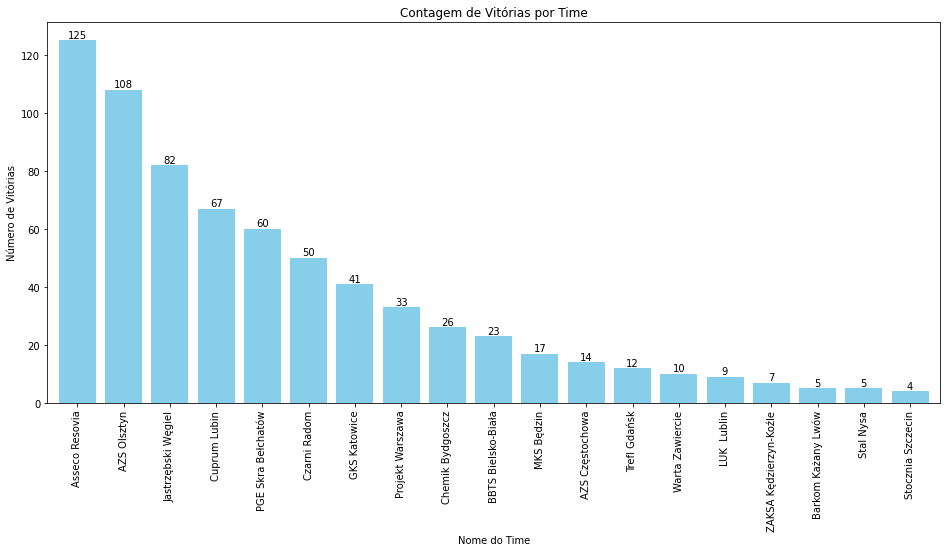

In [734]:
# Contar o número de vitórias para cada time
# Filtrar o DataFrame para incluir apenas as linhas onde 'Vencedor' é igual a 1
df_vitorias = df[df['Vencedor'] == 1]

# Contar as vitórias por time
contagem_vitorias_por_time = df_vitorias['T1'].value_counts()

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(16, 7))  # Ajustar o tamanho do gráfico
contagem_vitorias_por_time.plot(kind='bar', color='skyblue', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(contagem_vitorias_por_time):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Contagem de Vitórias por Time')
plt.xlabel('Nome do Time')
plt.ylabel('Número de Vitórias')

plt.show()

## MÉDIA DE PERCENTUAL DE BLOQUEIO POR TIME

In [735]:
# # Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
# percentual_bloqueio = pd.concat([df['T1_Perc_Bloqueio'], df['T2_Perc_Bloqueio']])

# # Calcular a média para cada time
# media_bloqueio_por_time = percentual_bloqueio.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# # Criar um gráfico de barras horizontal
# fig, ax = plt.subplots(figsize=(16, 7))
# media_bloqueio_por_time.sort_values().plot(kind='barh', color='skyblue', ax=ax)

# # # Adicionar rótulos de dados acima das barras
# # for i, v in enumerate(media_por_time):
# #     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# # Configurar o título e os rótulos do eixo
# plt.title('Média de Percentual de Bloqueio por Time')
# plt.xlabel('Média de Percentual de Bloqueio')
# plt.ylabel('Nome do Time')

# # Exibir o gráfico
# plt.show()

## MÉDIA DE PERCENTUAL DE EFICIÊNCIA DE SAQUE POR TIME

#### Aqui foi levado em consideração o seguinte cálculo: (Total de Aces - Total de Saques Errados) / Total de Saques + Total de Pontos marcados em um contra ataque do proprio saque

In [736]:
# # Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
# percentual_saque = pd.concat([df['T1_PercEficienciaSaque'], df['T2_PercEficienciaSaque']])

# # Calcular a média para cada time
# media_eficiencia_saque_por_time = percentual_saque.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# # Criar um gráfico de barras horizontal
# fig, ax = plt.subplots(figsize=(16, 7))
# media_eficiencia_saque_por_time.sort_values().plot(kind='barh', color='green', ax=ax)

# # # Adicionar rótulos de dados acima das barras
# # for i, v in enumerate(media_por_time):
# #     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# # Configurar o título e os rótulos do eixo
# plt.title('Média de Percentual de Eficiência de Saque por Time')
# plt.xlabel('Média de Percentual de Eficiência de Saque')
# plt.ylabel('Nome do Time')

# # Exibir o gráfico
# plt.show()

In [737]:
# df_relacao = pd.DataFrame({
#     'Contagem_Vitorias': contagem_vitorias_por_time,
#     'Media_Bloqueio': media_bloqueio_por_time, 
#     'Media_Saque': media_eficiencia_saque_por_time
# })

# df_relacao = df_relacao.sort_values(by=[
#     'Contagem_Vitorias', 
#     'Media_Bloqueio',
#     'Media_Saque'
# ], ascending=[False, False, False])

# df_relacao

In [738]:
# # Agrupando por ano e time, calculando médias e contagem de vitórias
# resultados = df.groupby(['Ano', 'T1']).agg({
#     'T1_PercEficienciaSaque': 'mean',
#     'T1_Perc_Bloqueio': 'mean',
#     'Nome_Time_Vencedor': 'count'
# }).reset_index()

# # Renomeando as colunas
# resultados = resultados.rename(columns={
#     'T1_PercEficienciaSaque': 'media_saques',
#     'T1_Perc_Bloqueio': 'media_bloqueio',
#     'Nome_Time_Vencedor': 'contagem_vitorias'
# })

# # Exibindo os resultados
# resultados


### GRÁFICO DISPERSÃO RELAÇÃO ENTRE MÉDIA DE BLOQUEIO E VITÓRIAS POR TIME

In [739]:
# # Criar um gráfico de dispersão
# plt.figure(figsize=(16, 7))
# plt.scatter(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'], color='skyblue')

# # Adicionar rótulos aos pontos
# for i, nome_time in enumerate(df_relacao.index):
#     plt.annotate(nome_time, (df_relacao['Media_Bloqueio'][i], df_relacao['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Configurar o título e os rótulos do eixo
# plt.title('Relação entre Média de Bloqueios e Número de Vitórias')
# plt.xlabel('Média de Bloqueios')
# plt.ylabel('Número de Vitórias')

# # Exibir o gráfico
# plt.show()


In [740]:
# Calcular o coeficiente de correlação
# coeficiente_pearson = scipy.stats.pearsonr(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson}')

```Uma correlação de 0.36 indica uma correlação positiva moderada entre as variáveis Media_Bloqueio e Contagem_Vitorias. Isso significa que, em média, à medida que a Media_Bloqueio aumenta, a Contagem_Vitorias também tende a aumentar, mas não de forma perfeita. A magnitude da correlação (0.36) sugere que a relação não é extremamente forte, mas ainda assim existe uma tendência positiva.```

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE EFICIENCIA DO SAQUE E VITÓRIAS POR TIME

In [741]:
# Criar um gráfico de dispersão
# plt.figure(figsize=(16, 7))
# plt.scatter(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'], color='green')

# # Adicionar rótulos aos pontos
# for i, nome_time in enumerate(df_relacao_saque.index):
#     plt.annotate(nome_time, (df_relacao_saque['Media_Saque'][i], df_relacao_saque['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Configurar o título e os rótulos do eixo
# plt.title('Relação entre Média de Eficiência de Saques e Número de Vitórias')
# plt.xlabel('Média de Eficiência de Saques')
# plt.ylabel('Número de Vitórias')

# # Exibir o gráfico
# plt.show()


In [742]:
# # Calcular o coeficiente de correlação
# coeficiente_pearson_saque = scipy.stats.pearsonr(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson_saque}')

```Ocoeficiente de correlação de Pearson é 0,8735802344182835. Esse valor é próximo de 1, o que indica uma correlação linear positiva forte entre as duas variáveis. Em outras palavras, as duas variáveis aumentam ou diminuem juntas.```